In [56]:
import nltk
import pandas as pd
import string
from nltk.stem import *
from nltk.stem.porter import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [57]:
# Downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EAndreas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
df = pd.read_csv('../data/facebook_comments.csv')

In [59]:
df.columns

Index(['comment_content'], dtype='object')

In [61]:
df_new = df[df['comment_content'].notnull()]

In [68]:
def text_processing(text):
    # Removing stop words
    stopwords = nltk.corpus.stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    # Removing panctuations
    text = text.translate(str.maketrans('','',string.punctuation))
    
    # text = ''.join(filter(lambda z: not z.isdigit(), text))
    # text = f'{text}'
    
    # Steming the words
    stemmer = nltk.stem.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    #Return processed text
    return text

# Processing facebook comments
df_new['processed_text'] = df_new['comment_content'].apply(text_processing)

C:\Users\EAndreas\AppData\Local\Temp\ipykernel_13624\2394236311.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['processed_text'] = df_new['comment_content'].apply(text_processing)


In [69]:
# Creating sentiment analyzer object
sentiment_analyser = SentimentIntensityAnalyzer()

In [70]:
def analyze_sentiment(text):
    # Getting sentiment scores
    sentiment_score = sentiment_analyser.polarity_scores(text)
    sentiment = ''
    
    # Classifying the sentiments
    if sentiment_score['compound'] > 0:
      sentiment = 'positive'
    elif sentiment_score['compound'] < 0:
      sentiment = 'negative'
    else:
      sentiment = 'neutral'
      
    return sentiment
  
df_new['sentiment'] = df_new['processed_text'].apply(analyze_sentiment)

C:\Users\EAndreas\AppData\Local\Temp\ipykernel_13624\3720835415.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sentiment'] = df_new['processed_text'].apply(analyze_sentiment)


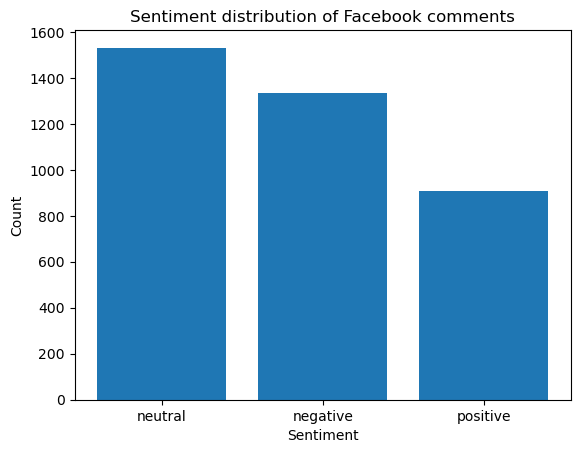

In [72]:
# Create a bar chart of the sentiment distribution
plt.bar(df_new['sentiment'].unique(), df_new['sentiment'].value_counts())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment distribution of Facebook comments')
plt.show()